In [1]:
# Import neuron
from neuron import h,gui

# Import Mechanisms
import os
current_directory = os.getcwd()
print(current_directory)
path = os.path.join(current_directory, "mechanisms", "nrnmech.dll")
print(path)
h.nrn_load_dll(path)

# Import utilities 
from neuron.units import ms,mV,um,V,m 
import matplotlib.pyplot as plt 
import numpy as np 
h.load_file("stdrun.hoc")
h.cvode_active(0) #turn off variable time step
# h.load_file("anatscale.hoc")


#Local Field Potential calculation
#h.load_file("./functions/field.hoc")

##### Import cell model
from functions.ballandstick import BallAndStick,BallAndStick_pas,BallAndStick2
cell=BallAndStick2(0,0,0,0,0,0)
print(cell.soma.nseg,cell.dend.nseg)

# Interpolate and set pointers between xtra and extracellular
h.load_file("./functions/interpxyz.hoc")
h.load_file("./functions/setpointers.hoc")

from functions.calcrx import setelec,homogenous,set_uniform_field_between_plates

v_plate=40*V #- potential difference between the plates
distance=1*m #distance
field_orientation=np.array([1,0,0])#along the x axis
ref_point=[0,0,0] #reference point with a 0 e_extracellular

set_uniform_field_between_plates(v_plate,distance,field_orientation,ref_point)


dt=1*ms
simtime=1000*ms
depth=0
modfreq=0
v_init=-65*mV

h.dt=dt
h.v_init=v_init

import functions.stim as stim
ton=20
amp=1000
dur=900
freq=10
depth=1
modfreq=5
times,stim1=stim.ampmodulation_wiki(ton,amp,depth,dt,dur,simtime,freq,modfreq)



simparams=[dt,simtime]
stimparams=[v_plate,ton,amp,dur,freq,depth,modfreq]
run_id=0
#Save parameters to a file
from functions.savedata import saveparams
folder=saveparams(run_id,cell,simparams,stimparams)


t=h.Vector().record(h._ref_t)
is_xtra=h.Vector().record(h._ref_is_xtra)
soma_v=h.Vector().record(cell.soma(0.5)._ref_v)
dend_v=h.Vector().record(cell.dend(0.5)._ref_v)
dend2_v=h.Vector().record(cell.dend2(0.5)._ref_v)
extracellular_v_soma = h.Vector().record(cell.soma(0.5)._ref_vext[0])


c:\Users\Pc\Documents\Charite\NEURON\Extracellular_test\Homogeneous_E-field
c:\Users\Pc\Documents\Charite\NEURON\Extracellular_test\Homogeneous_E-field\mechanisms\nrnmech.dll
1 151
After any change to cell geometry or nseg, be sure to invoke setpointers()
c:\Users\Pc\Documents\Charite\NEURON\Extracellular_test\Homogeneous_E-field


In [2]:
import functions.maxv_shplot as maxv_shplot
maxshift, callback= maxv_shplot.max_shift(cell)


In [3]:
h.finitialize(v_init)
h.continuerun(simtime)

0.0

In [4]:
fig=maxv_shplot.plot_maxshift(maxshift,folder,cell)


In [ ]:
print(maxshift)

[64.37318126521001, 63.05004283075715, 61.13929616971897, 60.936737485876186, 64.75691643064488, 61.66880096903016, 58.32467968974245, 55.19598977610481, 52.2689420121733, 49.53062796155791, 46.9689637715081, 45.218414572618094, 43.660156067756, 42.15109339988342, 40.691818471828405, 39.282612529367896, 37.9234858606876, 36.61421351639667, 35.35436740921168, 34.143345121843645, 32.98039572357737, 31.864642870286296, 30.795105438999435, 29.770715926460753, 28.790336821238327, 27.85277514114808, 26.956795308406832, 26.10113052607882, 25.28449279703888, 24.50558171950631, 23.76309217964217, 23.05572105093595, 22.382173000315795, 21.741165491880174, 21.131433070882615, 20.551731003041915, 20.00083833733877, 19.477560454144545, 18.98073115475765, 18.509214343154376, 18.061905345950997, 17.656332831782066, 17.356431840980733, 17.065818629073476, 16.784507181662534, 16.51247627971121, 16.249673491298402, 15.996018836733057, 15.75140815000887, 15.515716156353285, 15.288799286049183, 15.0704982

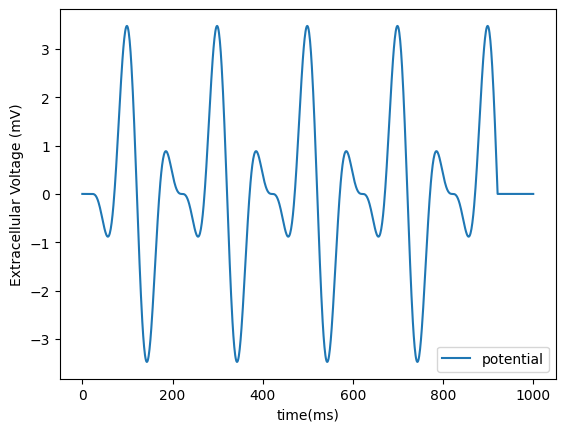

In [6]:
plt.Figure()
plt.plot(t,extracellular_v_soma,label="potential")
plt.xlabel("time(ms)")
plt.ylabel("Extracellular Voltage (mV)")
plt.legend()
plt.show()

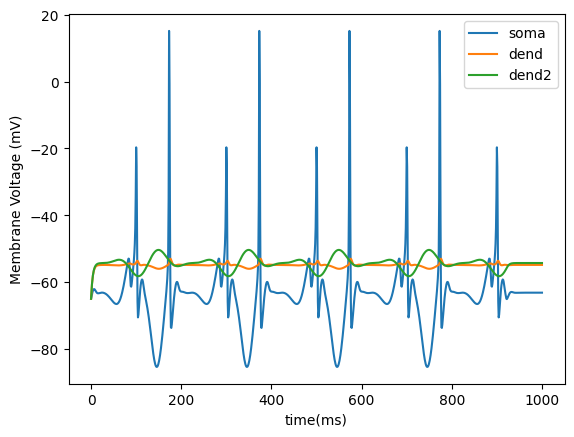

: 

In [ ]:
plt.Figure()
plt.plot(t,soma_v,label="soma")
plt.plot(t,dend_v,label="dend")
plt.plot(t,dend2_v,label="dend2")
plt.xlabel("time(ms)")
plt.ylabel("Membrane Voltage (mV)") #vint-vext~
plt.legend()
plt.show()